<a href="https://colab.research.google.com/github/lgy112112/Fastai_LiverTumor_Segmentation_Tutorial/blob/main/TensorVer_FuckingLiverTumorSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import😎**

In [1]:
import os
import glob
import cv2
import imageio

import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure
################################### KEY PACK: FASTAI ###################################
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

# **Introduce raw data from kaggle😶‍🌫️**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
download_path = "/content/drive/MyDrive/LiTs_Dataset"

# Create the directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)

# Download the dataset using the Kaggle API
kaggle.api.dataset_download_files(
    'andrewmvd/liver-tumor-segmentation',
    path=download_path,
    unzip=True
)

# **Numbering items🥱**

In [2]:

segmentation_directory = '/content/drive/MyDrive/LiTs_Dataset/segmentations'


entries = os.listdir(segmentation_directory)

num_entries = len(entries)

print("Number of entries in the directory:", num_entries)


Number of entries in the directory: 131


In [3]:

volume_directories = ['/content/drive/MyDrive/LiTs_Dataset/volume_pt1',
               '/content/drive/MyDrive/LiTs_Dataset/volume_pt2',
               '/content/drive/MyDrive/LiTs_Dataset/volume_pt3',
               '/content/drive/MyDrive/LiTs_Dataset/volume_pt4',
               '/content/drive/MyDrive/LiTs_Dataset/volume_pt5']
total = 0
for directory in volume_directories:

    entries = os.listdir(directory)

    num_entries = len(entries)
    total += num_entries
    print(f"Number of entries in {directory}:", num_entries)
print(f"Sum:", total)


Number of entries in /content/drive/MyDrive/LiTs_Dataset/volume_pt1: 11
Number of entries in /content/drive/MyDrive/LiTs_Dataset/volume_pt2: 10
Number of entries in /content/drive/MyDrive/LiTs_Dataset/volume_pt3: 10
Number of entries in /content/drive/MyDrive/LiTs_Dataset/volume_pt4: 10
Number of entries in /content/drive/MyDrive/LiTs_Dataset/volume_pt5: 10
Sum: 51


In [4]:


# Sort out index
segmentation_list = sorted([os.path.join(segmentation_directory, file) for file in os.listdir(segmentation_directory)], key=lambda x: int(x.split('-')[-1].split('.')[0]))


volume_list = []
for volume_directory in volume_directories:
    volume_files = [os.path.join(volume_directory, file) for file in os.listdir(volume_directory)]
    volume_files.sort(key=lambda x: int(x.split('-')[-1].split('.')[0]))
    volume_list.extend(volume_files)

print("Sorted Segmentation List:")
print(segmentation_list)
print("\nSorted Volume List:")
print(volume_list)


Sorted Segmentation List:
['/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-0.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-1.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-2.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-3.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-4.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-5.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-6.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-7.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-8.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-9.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-10.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-11.nii', '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-12.nii', '/content/drive/MyDrive/LiTs_Datas

In [5]:
segmentation_list = segmentation_list[0:51]

In [6]:
segmentation_list, volume_list

(['/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-0.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-1.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-2.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-3.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-4.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-5.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-6.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-7.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-8.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-9.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-10.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-11.nii',
  '/content/drive/MyDrive/LiTs_Dataset/segmentations/segmentation-12.nii',
  '/content/drive/MyDrive/LiTs_Data

# **After item, view data with *2 lists*😊**

---



In [7]:
import nibabel as nib
import numpy as np

def read_nii(filepath): # get a path
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array) #NOTICE: An Array is returned to view info

In [8]:
volume_index = 47
volume_path = volume_list[volume_index]

img = nib.load(volume_path)
header = img.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 225   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1. 

In [9]:
sample_index = 50
sample_ct = read_nii(volume_list[sample_index])
sample_mask = read_nii(segmentation_list[sample_index])

sample_ct.shape, sample_mask.shape

((512, 512, 240), (512, 512, 240))

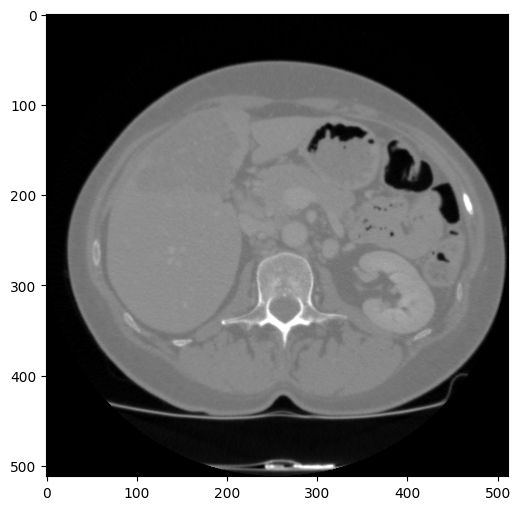

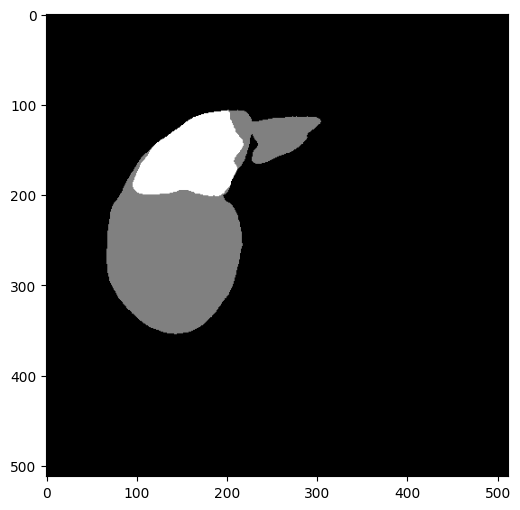

In [39]:
import random

sample_index = random.randint(0, len(volume_list)-1) # 28 is a typical one with 3 classes
sample_ct = read_nii(volume_list[sample_index])
sample_mask = read_nii(segmentation_list[sample_index])

def plot_slice(data, slice_number, figsize=(8, 6)):
  plt.figure(figsize=figsize)
  plt.imshow(data[:, :, slice_number], cmap='gray')
  plt.show()

# Calculate middle slice index
middle_slice = sample_ct.shape[2] // 2  # Assumes z-axis is the 3rd dimension

plot_slice(sample_ct, middle_slice)
plot_slice(sample_mask, middle_slice)


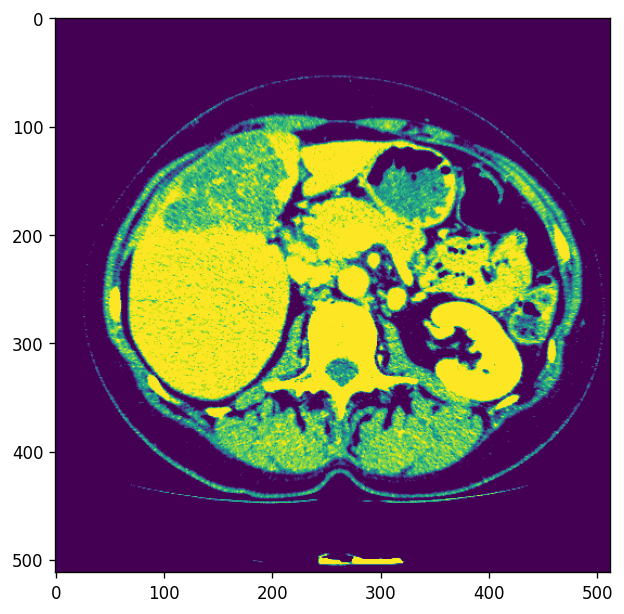

In [42]:
# Preprocess the nii file
# Source https://docs.fast.ai/medical.imaging.html

dicom_windows = types.SimpleNamespace( # some tuples to store
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min) #Normalization

figure(figsize=(8, 6), dpi=120)

file1 = tensor(sample_ct[..., middle_slice].astype(np.float32)).windowed(*dicom_windows.liver) # to get a tensor <function Tensor.type>
plt.imshow(file1);

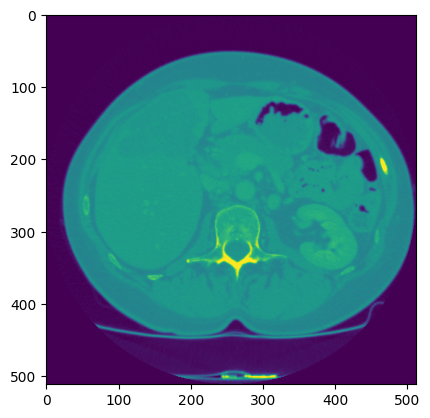

In [43]:
file2 = tensor(sample_ct[..., middle_slice].astype(np.float32))
plt.imshow(file2)

**and you can see here min and max value diff**

In [47]:
file1 = tensor(sample_mask[..., middle_slice].astype(np.float32)).windowed(*dicom_windows.liver)
file2 = tensor(sample_mask[..., middle_slice].astype(np.float32))
# plt.imshow(file1)
# plt.imshow(file2, alpha=0.5, cmap='bone')
# plt.imshow(file2)
import numpy as np
# Calculate min and max for file1 (after windowing)
min_value_file1 = file1.min().item()
max_value_file1 = file1.max().item()

print(f"file1 (windowed) - Min: {min_value_file1}, Max: {max_value_file1}")

# Calculate min and max for file2 (original)
min_value_file2 = file2.min().item()
max_value_file2 = file2.max().item()

print(f"file2 (original) - Min: {min_value_file2}, Max: {max_value_file2}")


file1 (windowed) - Min: 0.30000001192092896, Max: 0.31333333253860474
file2 (original) - Min: 0.0, Max: 2.0


In [14]:
import matplotlib.pyplot as plt

def plot_sample(array_list, color_map='nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(16, 12), dpi=100)

    plt.subplot(2, 2, 1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


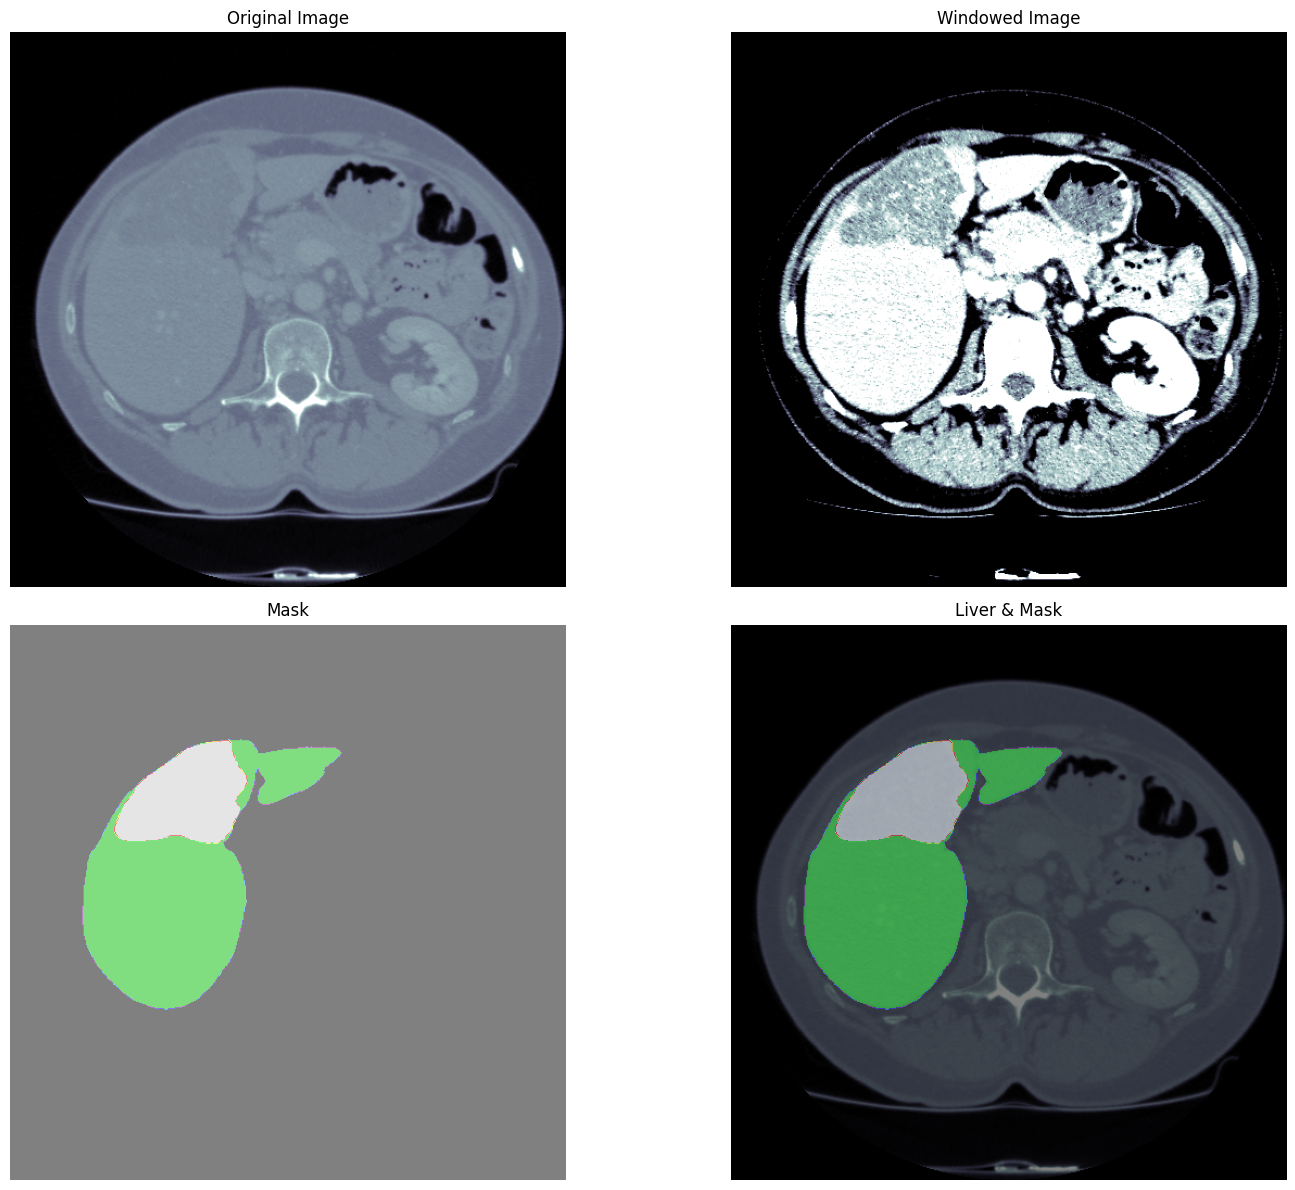

In [45]:
sample_slice = tensor(sample_ct[...,middle_slice].astype(np.float32))

plot_sample([sample_ct[..., middle_slice],
             sample_mask[..., middle_slice]])

In [49]:
# Check the mask values
mask = tensor(sample_mask[..., middle_slice].astype(np.uint8)) #uint8 to shift format right
unique, counts = np.unique(mask, return_counts=True)
print(np.array((unique, counts)).T)

[[     0 230990]
 [     1  23207]
 [     2   7947]]


# **We've got data, so next step is to feed dataloader**
1. convert into tensors in batches
2. some preprocess
3. resize